$ \huge{Proyecto \ de \ Deep \ Learning: Clasificaci \acute{o} n} $



Primero que todo conectamos con el drive. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Construccion de datasets

In [ ]:
import json
archivo_train = open('drive/MyDrive/DeepLearningUC/Proyecto/train-v2.0.json',)
train_file = json.load(archivo_train)

In [ ]:
data_train = train_file['data']

In [ ]:
train_all_data = []

In [ ]:
for i in range(len(data_train)):
  title = data_train[i]['title']
  elemento = data_train[i]['paragraphs']
  for j in range(len(elemento)):
    parrafo_particular = elemento[j]['context']
    qas = elemento[j]['qas']
    for k in range(len(qas)):
      pregunta_particular = qas[k]['question']
      es_imposible_particular = qas[k]['is_impossible']

      dict_add = {}
      dict_add['title'] = title.split(' ')
      dict_add['paragraph'] = parrafo_particular.split(' ')
      dict_add['is_impossible'] = es_imposible_particular
      dict_add['question'] = pregunta_particular.split(' ')

      train_all_data.append(dict_add)

In [ ]:
len(train_all_data)

130319

In [ ]:
train_all_data[0]

{'is_impossible': False,
 'paragraph': ['Beyoncé',
  'Giselle',
  'Knowles-Carter',
  '(/biːˈjɒnseɪ/',
  'bee-YON-say)',
  '(born',
  'September',
  '4,',
  '1981)',
  'is',
  'an',
  'American',
  'singer,',
  'songwriter,',
  'record',
  'producer',
  'and',
  'actress.',
  'Born',
  'and',
  'raised',
  'in',
  'Houston,',
  'Texas,',
  'she',
  'performed',
  'in',
  'various',
  'singing',
  'and',
  'dancing',
  'competitions',
  'as',
  'a',
  'child,',
  'and',
  'rose',
  'to',
  'fame',
  'in',
  'the',
  'late',
  '1990s',
  'as',
  'lead',
  'singer',
  'of',
  'R&B',
  'girl-group',
  "Destiny's",
  'Child.',
  'Managed',
  'by',
  'her',
  'father,',
  'Mathew',
  'Knowles,',
  'the',
  'group',
  'became',
  'one',
  'of',
  'the',
  "world's",
  'best-selling',
  'girl',
  'groups',
  'of',
  'all',
  'time.',
  'Their',
  'hiatus',
  'saw',
  'the',
  'release',
  'of',
  "Beyoncé's",
  'debut',
  'album,',
  'Dangerously',
  'in',
  'Love',
  '(2003),',
  'which',
  '

Ahora construimos el dev/val data set

In [ ]:
import json
archivo_val = open('drive/MyDrive/DeepLearningUC/Proyecto/dev-v2.0.json',)
val_file = json.load(archivo_val)

In [ ]:
data_val = val_file['data']

In [ ]:
val_all_data = []

In [ ]:
for i in range(len(data_val)):
  title = data_val[i]['title']
  elemento = data_val[i]['paragraphs']
  for j in range(len(elemento)):
    parrafo_particular = elemento[j]['context']
    qas = elemento[j]['qas']
    for k in range(len(qas)):
      pregunta_particular = qas[k]['question']
      es_imposible_particular = qas[k]['is_impossible']

      dict_add = {}
      dict_add['title'] = title.split(' ')
      dict_add['paragraph'] = parrafo_particular.split(' ')
      dict_add['is_impossible'] = es_imposible_particular
      dict_add['question'] = pregunta_particular.split(' ')

      val_all_data.append(dict_add)

In [ ]:
len(val_all_data)

11873

In [ ]:
val_all_data[0]

{'is_impossible': False,
 'paragraph': ['The',
  'Normans',
  '(Norman:',
  'Nourmands;',
  'French:',
  'Normands;',
  'Latin:',
  'Normanni)',
  'were',
  'the',
  'people',
  'who',
  'in',
  'the',
  '10th',
  'and',
  '11th',
  'centuries',
  'gave',
  'their',
  'name',
  'to',
  'Normandy,',
  'a',
  'region',
  'in',
  'France.',
  'They',
  'were',
  'descended',
  'from',
  'Norse',
  '("Norman"',
  'comes',
  'from',
  '"Norseman")',
  'raiders',
  'and',
  'pirates',
  'from',
  'Denmark,',
  'Iceland',
  'and',
  'Norway',
  'who,',
  'under',
  'their',
  'leader',
  'Rollo,',
  'agreed',
  'to',
  'swear',
  'fealty',
  'to',
  'King',
  'Charles',
  'III',
  'of',
  'West',
  'Francia.',
  'Through',
  'generations',
  'of',
  'assimilation',
  'and',
  'mixing',
  'with',
  'the',
  'native',
  'Frankish',
  'and',
  'Roman-Gaulish',
  'populations,',
  'their',
  'descendants',
  'would',
  'gradually',
  'merge',
  'with',
  'the',
  'Carolingian-based',
  'cultures'

Ahora tenemos todos los datos recopilados. Ahora debemos partir con el embedding, pero para esto primero tenemos que calcular el largo maximo de los titulos, parrafos y preguntas.

In [ ]:
len_paragraphs = []
len_titles = []
len_questions = []

for i in train_all_data:
  len_paragraphs.append(len(i['paragraph']))
  len_titles.append(len(i['title']))
  len_questions.append(len(i['question']))

for j in val_all_data:
  len_paragraphs.append(len(j['paragraph']))
  len_titles.append(len(j['title']))
  len_questions.append(len(j['question']))

In [ ]:
import numpy as np

In [ ]:
# Vemos primero el largo de los titulos

largos_titulos = np.array(len_titles)

In [ ]:
np.mean(largos_titulos)

1.0

In [ ]:
np.max(largos_titulos)

1

Nos damos cuenta que aquí no hay ningún problema en cuanto a largos de los titulos

In [ ]:
# Vemos ahora el largo de las preguntas

largos_preguntas = np.array(len_questions)

In [ ]:
np.mean(largos_preguntas)

10.139621075728593

In [ ]:
np.max(largos_preguntas)

25601

In [ ]:
from scipy import stats
stats.describe(largos_preguntas)

DescribeResult(nobs=142192, minmax=(1, 25601), mean=10.139621075728593, variance=4617.50646034407, skewness=375.64095377906085, kurtosis=141464.10683671138)

In [ ]:
contador = 0
threeshold = 20

for i in range(len(largos_preguntas)):
  if largos_preguntas[i] > threeshold:
    contador = contador + 1

In [ ]:
contador

1273

In [ ]:
(contador/len(largos_preguntas))*100

0.8952683695285247

Menos del 1% tiene preguntas con largos mayor a 20. Por ende, utilizaremos ese threeshold.

In [ ]:
# Vemos ahora el largo de los parrafos

largos_parrafos = np.array(len_paragraphs)

In [ ]:
np.mean(largos_parrafos)

120.30805530550242

In [ ]:
np.max(largos_parrafos)

653

In [ ]:
contador = 0
threeshold = 299

for i in range(len(largos_parrafos)):
  if largos_parrafos[i] > threeshold:
    contador = contador + 1

In [ ]:
contador

1121

In [ ]:
(contador/len(largos_parrafos))*100

0.7883706537639248

Como menos del 1% de los datos posee un largo de parrafo mayor o igual a 300, entonces utilizaremos ese threeshold para parrafos. 

Limpieza de los datos

In [ ]:
clean_train_all_data = []
clean_val_all_data = []

for i in range(len(train_all_data)):
  element = train_all_data[i]
  pregunta = element['question']
  parrafo = element['paragraph']

  if len(pregunta) <= 20 and len(parrafo) <= 299:
    clean_train_all_data.append(element)

#--------------------------------------------------

for j in range(len(val_all_data)):
  element = val_all_data[j]
  pregunta = element['question']
  parrafo = element['paragraph']

  if len(pregunta) <= 20 and len(parrafo) <= 299:
    clean_val_all_data.append(element)

In [ ]:
len(clean_train_all_data) # Sigue teniendo una cantidad similar de datos

128248

In [ ]:
len(clean_val_all_data) # Sigue teniendo una cantidad similar de datos

11575

Volvemos a calcular los largos

In [ ]:
len_paragraphs = []
len_titles = []
len_questions = []

for i in range(len(clean_train_all_data)):
  element = clean_train_all_data[i]

  len_paragraphs.append(len(element['paragraph']))
  len_titles.append(len(element['title']))
  len_questions.append(len(element['question']))


for j in range(len(clean_val_all_data)):
  element = clean_val_all_data[j]

  len_paragraphs.append(len(element['paragraph']))
  len_titles.append(len(element['title']))
  len_questions.append(len(element['question']))

In [ ]:
max(len_paragraphs)

299

In [ ]:
max(len_questions)

20

In [ ]:
clean_train_all_data[0].keys()

dict_keys(['title', 'paragraph', 'is_impossible', 'question'])

Ahora hacemos el padding sobre todos los datos. En particular nos concentraremos en los parrafos y en las preguntas.

In [ ]:
for i in range(len(clean_train_all_data)):

  # Padding en parrafo
  while len(clean_train_all_data[i]['paragraph']) < 299:
    clean_train_all_data[i]['paragraph'].append(' ')

  # Padding en pregunta
  while len(clean_train_all_data[i]['question']) < 20:
    clean_train_all_data[i]['question'].append(' ')

#------------------------------------------------------------

for j in range(len(clean_val_all_data)):

  # Padding en parrafo
  while len(clean_val_all_data[j]['paragraph']) < 299:
    clean_val_all_data[j]['paragraph'].append(' ')

  # Padding en pregunta
  while len(clean_val_all_data[j]['question']) < 20:
    clean_val_all_data[j]['question'].append(' ')

In [ ]:
pre_final_train_data = []

for i in range(len(clean_train_all_data)):

  add = []

  titulo = clean_train_all_data[i]['title']
  parrafo = clean_train_all_data[i]['paragraph']
  pregunta = clean_train_all_data[i]['question']
  imposible = clean_train_all_data[i]['is_impossible']

  add.append(titulo + parrafo)
  add.append(pregunta)

  if imposible == False:
    add.append(1) # NO es IMPOSIBLE -> Es posible
  else:
    add.append(0)

  pre_final_train_data.append(add)

In [ ]:
contador = 0

for i in range(len(pre_final_train_data)):
  if pre_final_train_data[i][2] == 1:
    contador = contador + 1

In [ ]:
print("El porcentaje de preguntas que se pueden responder en train: ", round((contador/len(pre_final_train_data))*100, 2))

El porcentaje de preguntas que se pueden responder en train:  66.51


In [ ]:
pre_final_val_data = []

for i in range(len(clean_val_all_data)):

  add = []

  titulo = clean_val_all_data[i]['title']
  parrafo = clean_val_all_data[i]['paragraph']
  pregunta = clean_val_all_data[i]['question']
  imposible = clean_val_all_data[i]['is_impossible']

  add.append(titulo + parrafo)
  add.append(pregunta)

  if imposible == False:
    add.append(1) # NO es IMPOSIBLE -> Es posible
  else:
    add.append(0)

  pre_final_val_data.append(add)

In [ ]:
contador = 0

for i in range(len(pre_final_val_data)):
  if pre_final_val_data[i][2] == 1:
    contador = contador + 1

In [ ]:
print("El porcentaje de preguntas que se pueden responder en val: ", round((contador/len(pre_final_val_data))*100, 2))

El porcentaje de preguntas que se pueden responder en val:  49.72


In [ ]:
# pre_final_train_data  # Estos son los datos de TRAIN que tenemos hasta el momento
# pre_final_val_data  # Estos son los datos de VAL que tenemos hasta el momento

Cambiamos ahora el largo

In [ ]:
N_train = 10_000
N_train_inicio = 5_000
N_train_fin = N_train_inicio + N_train
N_val = 5_000

pre_final_train_data = pre_final_train_data[N_train_inicio:N_train_fin]
pre_final_val_data = pre_final_val_data[0:N_val]

## Embedding

In [ ]:
import unicodedata

def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [ ]:
def sacar_signos(frase):
  nueva_frase = ''
  for char in frase:
    if char not in "[.;:!\'?,\"()\[\]<>&$#%=\{\}^-_/£":
      nueva_frase = nueva_frase + char
  return strip_accents(nueva_frase.lower())

In [ ]:
# Se debe limpiar de signos y de todo, así en el vocabulario también queda limpio
pre_final_train_data_no_signs = []

for i in range(len(pre_final_train_data)):
  parrafo = pre_final_train_data[i][0]
  pregunta = pre_final_train_data[i][1]

  parrafo_no_signs = []
  pregunta_no_signs = []

  for j in range(len(parrafo)):
    parrafo_no_signs.append(sacar_signos(parrafo[j]))

  for k in range(len(pregunta)):
    pregunta_no_signs.append(sacar_signos(pregunta[k]))
  
  add = []
  add.append(parrafo_no_signs)
  add.append(pregunta_no_signs)
  add.append(pre_final_train_data[i][2])

  pre_final_train_data_no_signs.append(add)

In [ ]:
pre_final_val_data_no_signs = []

for i in range(len(pre_final_val_data)):
  parrafo = pre_final_val_data[i][0]
  pregunta = pre_final_val_data[i][1]

  parrafo_no_signs = []
  pregunta_no_signs = []

  for j in range(len(parrafo)):
    parrafo_no_signs.append(sacar_signos(parrafo[j]))

  for k in range(len(pregunta)):
    pregunta_no_signs.append(sacar_signos(pregunta[k]))
  
  add = []
  add.append(parrafo_no_signs)
  add.append(pregunta_no_signs)
  add.append(pre_final_val_data[i][2])

  pre_final_val_data_no_signs.append(add)

In [ ]:
# Guardar la data hasta aqui

In [ ]:
my_path = 'drive/MyDrive/DeepLearningUC/Proyecto/Data_Previa'

In [ ]:
import os
import pickle

if not os.path.exists(my_path):
  os.makedirs(my_path)

In [ ]:
# Guardamos data
data_to_save = {'pre_final_train_data_no_signs': pre_final_train_data_no_signs, 'pre_final_val_data_no_signs': pre_final_val_data_no_signs}

In [ ]:
nombre_data = 'data_previa'
file_name = os.path.join(my_path, nombre_data)
outfile = open(file_name,'wb')
pickle.dump(data_to_save, outfile)
outfile.close()

In [ ]:
# Cargamos la data previa

import os
import pickle
import json
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nombre_data = 'data_previa'
my_path = 'drive/MyDrive/DeepLearningUC/Proyecto/Data_Previa'
file_name = os.path.join(my_path, nombre_data)
infile = open(file_name, 'rb')
data_to_save = pickle.load(infile)
infile.close()

In [ ]:
pre_final_train_data_no_signs = data_to_save['pre_final_train_data_no_signs']
pre_final_val_data_no_signs = data_to_save['pre_final_val_data_no_signs']

In [ ]:
import gensim.downloader

In [ ]:
glove_vectors = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
def zero_vector(dimension):
  lista = []
  for i in range(dimension):
    lista.append(0)
  lista = np.array(lista, dtype = np.float32)
  return lista

In [ ]:
final_train_data_no_signs = []

for i in range(len(pre_final_train_data_no_signs)):
  elemento = pre_final_train_data_no_signs[i]

  parrafo = elemento[0]
  pregunta = elemento[1]
  posible = elemento[2]

  parrafo_embedding = []
  pregunta_embedding = []

  if i % 100 == 0:
    print(i)

  for j in range(len(parrafo)):
    palabra = parrafo[j]

    if palabra not in glove_vectors.vocab:
      parrafo_embedding.append(zero_vector(300))
    else:
      parrafo_embedding.append(glove_vectors[palabra])

  
  for k in range(len(pregunta)):
    palabra = pregunta[k]

    if palabra not in glove_vectors.vocab:
      pregunta_embedding.append(zero_vector(300))
    else:
      pregunta_embedding.append(glove_vectors[palabra])
  
  add = []

  add.append(parrafo_embedding)
  add.append(pregunta_embedding)
  add.append(posible)

  final_train_data_no_signs.append(add)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [ ]:
# Guardamos esta data

In [ ]:
my_path = 'drive/MyDrive/DeepLearningUC/Proyecto/Data'

In [ ]:
import os
import pickle

if not os.path.exists(my_path):
  os.makedirs(my_path)

In [ ]:
# Guardamos data
data_to_save = {'final_train_data_no_signs': final_train_data_no_signs}

In [ ]:
nombre_data = 'data_train'
file_name = os.path.join(my_path, nombre_data)
outfile = open(file_name,'wb')
pickle.dump(data_to_save, outfile)
outfile.close()

In [ ]:
# Cargamos la data train

import os
import pickle
import json
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nombre_data = 'data_train'
my_path = 'drive/MyDrive/DeepLearningUC/Proyecto/Data'
file_name = os.path.join(my_path, nombre_data)
infile = open(file_name, 'rb')
data_to_save = pickle.load(infile)
infile.close()

In [ ]:
final_train_data_no_signs = data_to_save['final_train_data_no_signs']

In [ ]:
# Validacion

In [ ]:
final_val_data_no_signs = []

for i in range(len(pre_final_val_data_no_signs)):
  elemento = pre_final_val_data_no_signs[i]

  parrafo = elemento[0]
  pregunta = elemento[1]
  posible = elemento[2]

  parrafo_embedding = []
  pregunta_embedding = []

  if i % 100 == 0:
    print(i)

  for j in range(len(parrafo)):
    palabra = parrafo[j]

    if palabra not in glove_vectors.vocab:
      parrafo_embedding.append(zero_vector(300))
    else:
      parrafo_embedding.append(glove_vectors[palabra])

  for k in range(len(pregunta)):
    palabra = pregunta[k]

    if palabra not in glove_vectors.vocab:
      pregunta_embedding.append(zero_vector(300))
    else:
      pregunta_embedding.append(glove_vectors[palabra])
  
  add = []

  add.append(parrafo_embedding)
  add.append(pregunta_embedding)
  add.append(posible)

  final_val_data_no_signs.append(add)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [ ]:
# Guardamos esta data

In [ ]:
my_path = 'drive/MyDrive/DeepLearningUC/Proyecto/Data'

In [ ]:
import os
import pickle

if not os.path.exists(my_path):
  os.makedirs(my_path)

In [ ]:
# Guardamos data
data_to_save = {'final_val_data_no_signs': final_val_data_no_signs}

In [ ]:
nombre_data = 'data_val'
file_name = os.path.join(my_path, nombre_data)
outfile = open(file_name,'wb')
pickle.dump(data_to_save, outfile)
outfile.close()

In [ ]:
# Cargamos la data val

import os
import pickle
import json
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nombre_data = 'data_val'
my_path = 'drive/MyDrive/DeepLearningUC/Proyecto/Data'
file_name = os.path.join(my_path, nombre_data)
infile = open(file_name, 'rb')
data_to_save = pickle.load(infile)
infile.close()

In [ ]:
final_val_data_no_signs = data_to_save['final_val_data_no_signs']

In [ ]:
# TRAIN

input_seq_train_no_final = []
label_seq_train_no_final = []

for i in range(len(final_train_data_no_signs)):
  elemento = final_train_data_no_signs[i]

  parrafo = elemento[0]
  pregunta = elemento[1]
  posible = elemento[2]

  input_seq_train_no_final.append(pregunta+parrafo)
  label_seq_train_no_final.append(posible)

In [ ]:
# DEV AND TEST

input_seq_dev_no_final = []
label_seq_dev_no_final = []

input_seq_test_no_final = []
label_seq_test_no_final = []

for i in range(len(final_val_data_no_signs)):

  elemento = final_val_data_no_signs[i]

  parrafo = elemento[0]
  pregunta = elemento[1]
  posible = elemento[2]

  if i < 2500:
    # Dev
    input_seq_dev_no_final.append(pregunta+parrafo)
    label_seq_dev_no_final.append(posible)

  else: 
    # Test
    input_seq_test_no_final.append(pregunta+parrafo)
    label_seq_test_no_final.append(posible)

Ahora esta todo listo el Embedding y la separación de datos. Ahora solo faltan los data loaders y la creacion del modelo. 

In [ ]:
# Visualización: TRAIN

In [ ]:
len(input_seq_train_no_final)

10000

In [ ]:
len(input_seq_train_no_final[0])

320

In [ ]:
len(input_seq_train_no_final[0][0])

300

In [ ]:
input_seq_train_no_final[0][0][0]

0.13964844

In [ ]:
label_seq_train_no_final

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
p1 = np.array(label_seq_train_no_final)

In [ ]:
np.mean(p1)

0.6637

In [ ]:
# Visualización: DEV

In [ ]:
len(input_seq_dev_no_final)

2500

In [ ]:
len(input_seq_dev_no_final[0])

320

In [ ]:
len(input_seq_dev_no_final[0][0])

300

In [ ]:
input_seq_dev_no_final[0][0][0]

0.0703125

In [ ]:
label_seq_dev_no_final

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,


In [ ]:
p2 = np.array(label_seq_dev_no_final)

In [ ]:
np.mean(p2)

0.5076

In [ ]:
# Visualización: TEST

In [ ]:
len(input_seq_test_no_final)

2500

In [ ]:
len(input_seq_test_no_final[0])

320

In [ ]:
len(input_seq_test_no_final[0][0])

300

In [ ]:
input_seq_test_no_final[0][0][0]

0.13964844

In [ ]:
label_seq_test_no_final

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [ ]:
p3 = np.array(label_seq_test_no_final)

In [ ]:
np.mean(p3)

0.4604

In [ ]:
# features = np.zeros((batch_size, seq_len, 1), dtype=np.int64)

Guardaremos la data y luego si queremos volver a usar ese embedding lo volvemos a cargar, pero antes de eso lo dejamos hasta ahí.

In [ ]:
my_path = 'drive/MyDrive/DeepLearningUC/Proyecto/Data'

In [ ]:
import os
import pickle

if not os.path.exists(my_path):
  os.makedirs(my_path)

In [ ]:
# Guardamos data
data_to_save = {'input_seq_train_no_final': input_seq_train_no_final, 'label_seq_train_no_final': label_seq_train_no_final, 'input_seq_dev_no_final': input_seq_dev_no_final,
                'label_seq_dev_no_final': label_seq_dev_no_final, 'input_seq_test_no_final': input_seq_test_no_final, 'label_seq_test_no_final': label_seq_test_no_final}

In [ ]:
nombre_data = 'data'
file_name = os.path.join(my_path, nombre_data)
outfile = open(file_name,'wb')
pickle.dump(data_to_save, outfile)
outfile.close()

In [ ]:
# Cargamos toda la data

In [ ]:
import os
import pickle
import json
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nombre_data = 'data'
my_path = 'drive/MyDrive/DeepLearningUC/Proyecto/Data'
file_name = os.path.join(my_path, nombre_data)
infile = open(file_name, 'rb')
data_to_save = pickle.load(infile)
infile.close()

In [ ]:
input_seq_train_no_final = data_to_save['input_seq_train_no_final']
label_seq_train_no_final = data_to_save['label_seq_train_no_final']

input_seq_dev_no_final = data_to_save['input_seq_dev_no_final']
label_seq_dev_no_final = data_to_save['label_seq_dev_no_final']

input_seq_test_no_final = data_to_save['input_seq_test_no_final']
label_seq_test_no_final = data_to_save['label_seq_test_no_final']

## Creacion de batches

In [ ]:
import re
import nltk
import math
import time
import torch
import torchtext
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
nltk.download('stopwords')
import matplotlib.pyplot as plt
from torchtext.vocab import GloVe
from nltk.corpus import stopwords
from torchtext import data, datasets
from collections import defaultdict, Counter
from torch.utils.data import DataLoader, TensorDataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def transformar_batches_input(input_seq, batch_size):
  N = int(len(input_seq)/batch_size)
  n = int(N/100)

  lista = []

  for i in range(N):
    
    if n != 0:
      if i % n == 0:
        print("Vamos en el porcentaje: ", round((i/N)*100, 2))

    elemento = input_seq[i*batch_size:(i+1)*batch_size]
    a = len(elemento)
    b = len(elemento[0])
    c = len(elemento[0][0])
    tensor = np.zeros((a, b, c), dtype = np.float32)

    for i1 in range(a):
      for i2 in range(b):
        for i3 in range(c):
          tensor[i1][i2][i3] = elemento[i1][i2][i3]

    tensor = torch.from_numpy(tensor)      
    lista.append(tensor)
    
  return lista

In [ ]:
def transformar_batches_label(label_seq, batch_size):

  N = int(len(label_seq)/batch_size)
  n = int(N/100)

  lista = []

  for i in range(N):
    
    if n != 0:
      if i % n == 0:
        print("Vamos en el porcentaje: ", round((i/N)*100, 2))
      
    elemento = label_seq[i*batch_size:(i+1)*batch_size]
    a = len(elemento)
    tensor = np.zeros((a), dtype = np.int64)

    for i1 in range(a):
      tensor[i1] = elemento[i1]

    tensor = torch.from_numpy(tensor)      
    lista.append(tensor)
    
  return lista

In [ ]:
# TRAIN

print("TRAIN")
print("\n")

start = time.time()

batch_size = 32

print("input seq \n")
input_seq_train_final = transformar_batches_input(input_seq_train_no_final, batch_size)
print("label seq \n")
label_seq_train_final = transformar_batches_label(label_seq_train_no_final, batch_size)

end = time.time()

print("El procesamiento de train se demoro: ", end-start)

print("\n")

# DEV

print("DEV")
print("\n")

start = time.time()

print("input seq \n")
input_seq_dev_final = transformar_batches_input(input_seq_dev_no_final, len(input_seq_dev_no_final))
print("label seq \n")
label_seq_dev_final = transformar_batches_label(label_seq_dev_no_final, len(label_seq_dev_no_final))

end = time.time()

print("El procesamiento de dev se demoro: ", end-start)

print("\n")

# TEST

print("TEST")
print("\n")

start = time.time()

print("input seq \n")
input_seq_test_final = transformar_batches_input(input_seq_test_no_final, len(input_seq_test_no_final))
print("label seq \n")
label_seq_test_final = transformar_batches_label(label_seq_test_no_final, len(label_seq_test_no_final))

end = time.time()

print("El procesamiento de test se demoro: ", end-start)

print("\n")

TRAIN


input seq 

Vamos en el porcentaje:  0.0
Vamos en el porcentaje:  0.96
Vamos en el porcentaje:  1.92
Vamos en el porcentaje:  2.88
Vamos en el porcentaje:  3.85
Vamos en el porcentaje:  4.81
Vamos en el porcentaje:  5.77
Vamos en el porcentaje:  6.73
Vamos en el porcentaje:  7.69
Vamos en el porcentaje:  8.65
Vamos en el porcentaje:  9.62
Vamos en el porcentaje:  10.58
Vamos en el porcentaje:  11.54
Vamos en el porcentaje:  12.5
Vamos en el porcentaje:  13.46
Vamos en el porcentaje:  14.42
Vamos en el porcentaje:  15.38
Vamos en el porcentaje:  16.35
Vamos en el porcentaje:  17.31
Vamos en el porcentaje:  18.27
Vamos en el porcentaje:  19.23
Vamos en el porcentaje:  20.19
Vamos en el porcentaje:  21.15
Vamos en el porcentaje:  22.12
Vamos en el porcentaje:  23.08
Vamos en el porcentaje:  24.04
Vamos en el porcentaje:  25.0
Vamos en el porcentaje:  25.96
Vamos en el porcentaje:  26.92
Vamos en el porcentaje:  27.88
Vamos en el porcentaje:  28.85
Vamos en el porcentaje:  29.81
Va

## Creacion de modelo

In [ ]:
import re
import nltk
import math
import time
import torch
import torchtext
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
nltk.download('stopwords')
import matplotlib.pyplot as plt
from torchtext.vocab import GloVe
from nltk.corpus import stopwords
from torchtext import data, datasets
from collections import defaultdict, Counter
from torch.utils.data import DataLoader, TensorDataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def precision(output, label):
  predicciones = []

  for i in range(len(output)):
    if output[i][1] > output[i][0]:
      predicciones.append(1)
    else:
      predicciones.append(0)

  prec = 0

  for k in range(len(output)):
    v = (predicciones[k] == label[k]).item()
    if v == True:
      prec = prec + 1
  
  prec = prec/len(output)

  return prec

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, device):
        super(Model, self).__init__()

        self.input_size = input_size
        self.output_size = output_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.device = device
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(hidden_dim*320, output_size)
        self.logsoftmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):

        batch_size = len(x)

        h = self.init_hidden(batch_size)
        c = self.init_hidden(batch_size)

        out, (h, c) = self.lstm(x, (h,c))
        out = self.flatten(out)
        out = self.fc(out)
        out = self.logsoftmax(out)

        return out
    
    def init_hidden(self, batch_size):
        h = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return h.to(self.device)

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")    
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [ ]:
input_size = 300
output_size = 2
hidden_dim = 20
n_layers = 1

model = Model(input_size, output_size, hidden_dim, n_layers, device)
model = model.to(device)

In [ ]:
n_epochs = 100
lr=0.0001

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
# Entrenamiento

epocas_totales = []

loss_train_totales = []
prec_train_totales = []

loss_val_totales = []
prec_val_totales = []

for epoch in range(1, n_epochs + 1):

  loss_train_total = 0
  prec_train_total = 0

  model.train()

  for i in range(len(input_seq_train_final)):

    input_train = input_seq_train_final[i]
    label_train = label_seq_train_final[i]

    input_train = input_train.to(device)
    label_train = label_train.to(device)

    output_train = model(input_train)

    loss_train = criterion(output_train, label_train)

    loss_train.backward()
    optimizer.step()

    loss_train_total = loss_train_total + float(loss_train.item())

    prec_train = precision(output_train, label_train)
    prec_train_total = prec_train_total + prec_train
  
  loss_train_total = loss_train_total/len(input_seq_train_final)
  prec_train_total = prec_train_total/len(input_seq_train_final)

  model.eval()

  input_val = input_seq_dev_final[0]
  label_val = label_seq_dev_final[0]

  input_val = input_val.to(device)
  label_val = label_val.to(device)

  output_val = model(input_val)

  loss_val = criterion(output_val, label_val).item()
  prec_val = precision(output_val, label_val)

  epocas_totales.append(epoch)
  loss_train_totales.append(loss_train_total)
  prec_train_totales.append(prec_train_total)


  loss_val_totales.append(loss_val)
  prec_val_totales.append(prec_val)

  print("--------------------")
  print("Epoca: ", epoch)
  print("Perdida Entrenamiento: ", loss_train_total)
  print("Precision Entrenamiento: ", prec_train_total)

  print("Perdida Validacion: ", loss_val)
  print("Precision Validacion: ", prec_val)

  print("--------------------")


--------------------
Epoca:  1
Perdida Entrenamiento:  1.479007716068083
Precision Entrenamiento:  0.6159855769230769
Perdida Validacion:  3.196399211883545
Precision Validacion:  0.5076
--------------------
--------------------
Epoca:  2
Perdida Entrenamiento:  2.142898354599439
Precision Entrenamiento:  0.5545873397435898
Perdida Validacion:  1.6302720308303833
Precision Validacion:  0.4924
--------------------
--------------------
Epoca:  3
Perdida Entrenamiento:  1.6595527627339322
Precision Entrenamiento:  0.5181290064102564
Perdida Validacion:  0.7845401167869568
Precision Validacion:  0.5072
--------------------
--------------------
Epoca:  4
Perdida Entrenamiento:  0.9473062395476378
Precision Entrenamiento:  0.5207331730769231
Perdida Validacion:  1.2673871517181396
Precision Validacion:  0.5076
--------------------
--------------------
Epoca:  5
Perdida Entrenamiento:  0.8940668794690655
Precision Entrenamiento:  0.5996594551282052
Perdida Validacion:  1.1382362842559814
Prec

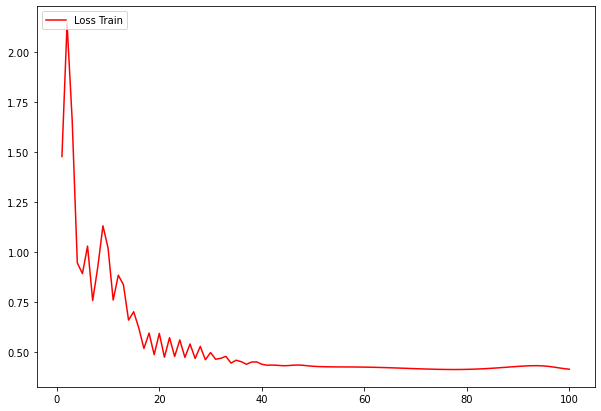

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(epocas_totales, loss_train_totales, color = "red")
plt.legend(['Loss Train'], loc='upper left')

plt.show()

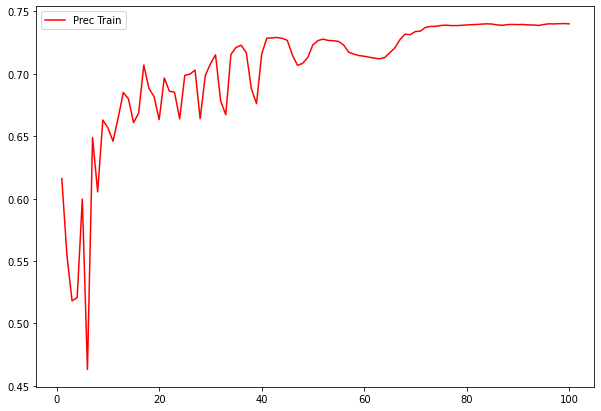

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(epocas_totales, prec_train_totales, color = "red")
plt.legend(['Prec Train'], loc='upper left')

plt.show()